<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
( x_train,y_train) , ( x_test,y_test ) = load_data(path='mnist.npz')
x_train.shape,y_train.shape,x_test.shape,y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# y_train[4] , x_train[4]
y_train[50000],x_train[50000]

3 <class 'numpy.uint8'>


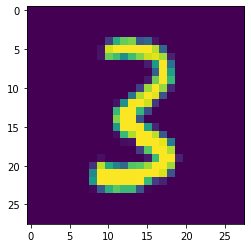

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000],type(y_train[50000]))

In [13]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [14]:
x_test = x_test.reshape(-1,28*28)
x_test.shape

(10000, 784)

In [15]:
y_train[2:10] , y_train.shape 

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

#apply model

In [16]:
import tensorflow as tf

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer

model.add(tf.keras.layers.Dense(10,activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(10,activation='relu')) # hidden layer

# 세개 이상 --> softmax ,  binary --> sigmoid
model.add(tf.keras.layers.Dense(10,activation='softmax')) # output layer

# regression --> loss : mse
# binary classification --> loss : binary crossentropy 
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
# 참고 자료 : https://gomguard.tistory.com/187

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [22]:
hist = model.fit(x_train,y_train,epochs=100,validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3971 - acc: 0.1942 - val_loss: 1.9445 - val_acc: 0.2676
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.7844 - acc: 0.3346 - val_loss: 1.5341 - val_acc: 0.4468
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4193 - acc: 0.5126 - val_loss: 1.2609 - val_acc: 0.5827
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1557 - acc: 0.6086 - val_loss: 1.0618 - val_acc: 0.6265
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.9867 - acc: 0.6663 - val_loss: 0.8563 - val_acc: 0.7082
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.8176 - acc: 0.7388 - val_loss: 0.7837 - val_acc: 0.7407
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.7569 - acc: 0.7618 - val_loss: 0.7081 - val_acc: 0.7751
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [23]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

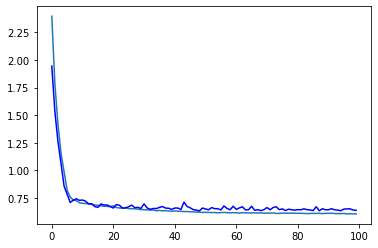

In [31]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')

plt.show()

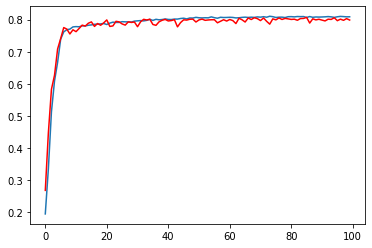

In [43]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()

In [35]:
y_test[30]

3

In [ ]:
model.predict(x_test[30])